In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import seaborn as sns
import pickle

In [15]:


# List of pickle files
pickle_files = [
    '/home/lee/home/jaccard processing/nownow/jaccard_data/BRCA_jaccard_data.pkl', 
    '/home/lee/home/jaccard processing/nownow/jaccard_data/LUAD_jaccard_data.pkl', 
    '/home/lee/home/jaccard processing/nownow/jaccard_data/LIHC_jaccard_data.pkl', 
    '/home/lee/home/jaccard processing/nownow/jaccard_data/STAD_jaccard_data.pkl', 
    '/home/lee/home/jaccard processing/nownow/jaccard_data/COAD_jaccard_data.pkl'
]

total_sametype_jaccard = []
total_differenttype_jaccard = []

# Iterate through each pickle file and sum the Jaccard values
for file in pickle_files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        total_sametype_jaccard.extend(data["sametype_jaccard"])
        total_differenttype_jaccard.extend(data["differenttype_jaccard"])



In [16]:
import scipy.stats as stats



# 정규성 검정
stat1, p_value1 = stats.shapiro(total_sametype_jaccard)
stat2, p_value2 = stats.shapiro(total_differenttype_jaccard)

print("Shapiro-Wilk Test:")
print(f"sametype_jaccard - Statistic: {stat1:.3f}, P-value: {p_value1:.3f}")
print(f"differenttype_jaccard - Statistic: {stat2:.3f}, P-value: {p_value2:.3f}")

print('\n')

# wilcoxon's Test 수행
stat, p_value = stats.wilcoxon(total_sametype_jaccard, total_differenttype_jaccard)

print("Wilcoxon Test:")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")  # 이때 0.05 미만이면 분산이 동일하지 않음을 의미한다.

print('\n')

Shapiro-Wilk Test:
sametype_jaccard - Statistic: 0.970, P-value: 0.000
differenttype_jaccard - Statistic: 0.961, P-value: 0.000


Wilcoxon Test:
Statistic: 5996175804.000
P-value: 0.000




/BiO/lee/woody/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 167473.
  res = hypotest_fun_out(*samples, **kwds)


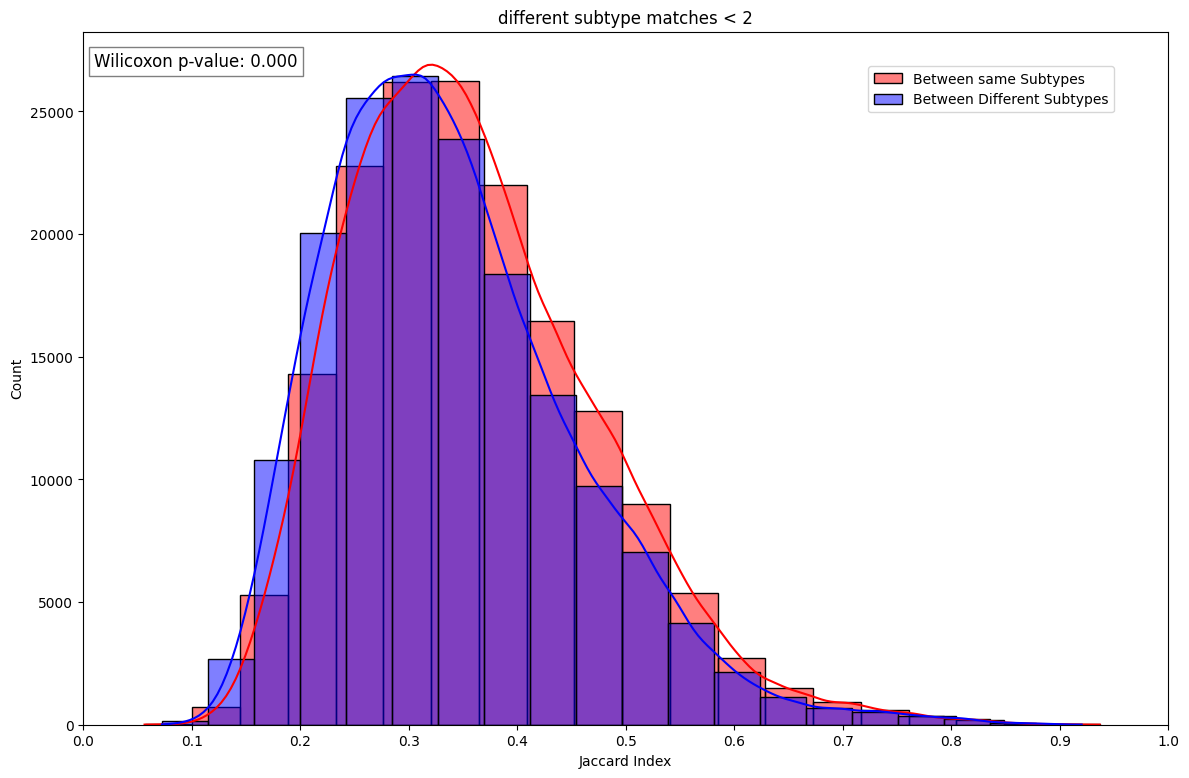

In [18]:
# 그래프 크기 설정
plt.figure(figsize=(14, 9))

# 서로 다른 서브타입 간 자카드 인덱스 히스토그램 추가
sns.histplot(total_sametype_jaccard, bins=20, kde=True, color='red', label='Between same Subtypes')
sns.histplot(total_differenttype_jaccard, bins=20, kde=True, color='blue', label='Between Different Subtypes')

# 0.5 축에 세로선 추가
#plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

plt.xlim(0.1, 0.9)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('different subtype matches < 2')
plt.xlabel('Jaccard Index')
plt.ylabel('Count')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

# 범례를 그래프 안으로 이동
plt.legend( loc='upper right', bbox_to_anchor=(0.95, 0.95), borderaxespad=0.)
# p-value 텍스트 추가
p_value_text = f'Wilicoxon p-value: {p_value:.3f}'
plt.text(0.01, max(plt.gca().get_ylim())*0.95, p_value_text, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()